# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
(rumore zero e rumore bianco, scorrelato)

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [233]:
# parametri con cui giocare

N_epochs = 30
N_train = 3000
Sigma = 0.1

# target parameters of f(x) = m*x + b
#m = 2 # slope
#b = 1 # intersect

# target parameters of f(x) = 4 - 3x - 2x^2 + 3x^3
# forma: f(x) = ax^3 + bx^2 + cx + d
a = 3 
b = -2
c = -3
d = 4

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train) 
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
#y_target = m * x_valid + b # ideal (target) linear function
y_target = a * x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d # ideal (target) polinomial function


sigma = Sigma # noise standard deviation, for the moment it is absent 
#y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
#y_valid = np.random.normal(m * x_valid + b, sigma)
y_train = np.random.normal(a * x_train*x_train*x_train + b*x_train*x_train + c*x_train + d, sigma) 
y_valid = np.random.normal(a * x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d, sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

Epoch 1/30
94/94 [==============================] - 3s 17ms/step - loss: 1.7769 - mse: 1.7769 - val_loss: 0.2249 - val_mse: 0.2249
Epoch 2/30
94/94 [==============================] - 1s 9ms/step - loss: 0.2177 - mse: 0.2177 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 3/30
94/94 [==============================] - 1s 11ms/step - loss: 0.1027 - mse: 0.1027 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 4/30
94/94 [==============================] - 1s 13ms/step - loss: 0.0568 - mse: 0.0568 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 5/30
94/94 [==============================] - 1s 12ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 6/30
94/94 [==============================] - 1s 13ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 7/30
94/94 [==============================] - 1s 12ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 8/30
94/94 [==============================] - 1s 12ms/step - loss: 0.0186 - ms

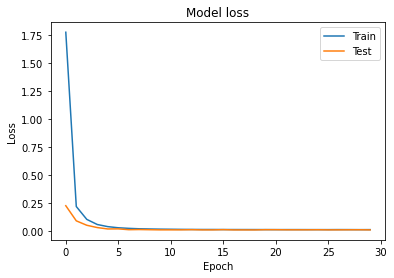

100
100


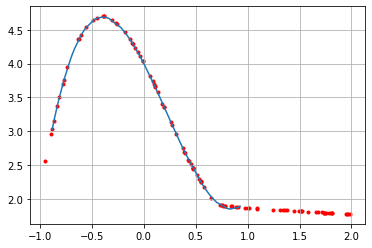

In [238]:
# NOTA: USO PYTHON 3.9.12

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(200, input_shape=(1,), activation = 'relu')) # <<<<<<<<<<<<<<<<<<<<<<< numero di neuroni
                                        # nota: funzione di attivazione (non lineare), 
                                        # (esplorare quali vanno meglio)
model.add(Dense(100, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
#model.summary()

# We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train 
# from which the optimizer will find the best weights to minimize the Mean Square Error loss function 
# (out linear regression function).

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(    x=x_train, y=y_train, 
                        batch_size=32, epochs=N_epochs, # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< N_epochs!
                        shuffle=True, # a good idea is to shuffle input before at each epoch
                        validation_data=(x_valid, y_valid)
                        )


# By looking at weights and biases we can see if the fit was successfull:
# return weights and biases
# model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")

x_predicted = np.random.uniform(-1, 2, 100)
y_predicted = model.predict(x_predicted) # perchè ha dimensione doppia di x_predicted? perchè devo finire con un solo nodo
print(x_predicted.size)
print(y_predicted.size)

plt.scatter(x_predicted, y_predicted, marker = ".", color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()


Epoch 1/30
94/94 [==============================] - 2s 13ms/step - loss: 12.1092 - mse: 12.1092 - val_loss: 12.9102 - val_mse: 12.9102
Epoch 2/30
94/94 [==============================] - 1s 10ms/step - loss: 12.1092 - mse: 12.1092 - val_loss: 12.9102 - val_mse: 12.9102
Epoch 3/30
94/94 [==============================] - 1s 13ms/step - loss: 12.1092 - mse: 12.1092 - val_loss: 12.9102 - val_mse: 12.9102
Epoch 4/30
94/94 [==============================] - 1s 10ms/step - loss: 12.1092 - mse: 12.1092 - val_loss: 12.9102 - val_mse: 12.9102
Epoch 5/30
94/94 [==============================] - 1s 11ms/step - loss: 12.1092 - mse: 12.1092 - val_loss: 12.9102 - val_mse: 12.9102
Epoch 6/30
94/94 [==============================] - 1s 11ms/step - loss: 12.1092 - mse: 12.1092 - val_loss: 12.9102 - val_mse: 12.9102
Epoch 7/30
94/94 [==============================] - 1s 12ms/step - loss: 12.1092 - mse: 12.1092 - val_loss: 12.9102 - val_mse: 12.9102
Epoch 8/30
94/94 [==============================] - 1s 

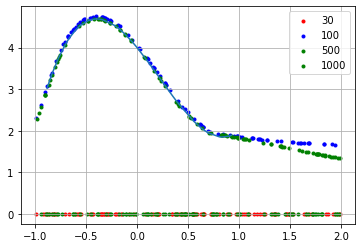

In [5]:
# NOTA: USO PYTHON 3.9.12
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# parametri con cui giocare
N_epochs = 30
N_train = 3000
Sigma = 0.1

# target parameters of f(x) = ax^3 + bx^2 + cx + d
a = 3 
b = -2
c = -3
d = 4

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train) 
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a * x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d # ideal (target) polinomial function

sigma = Sigma # noise standard deviation
y_train = np.random.normal(a * x_train*x_train*x_train + b*x_train*x_train + c*x_train + d, sigma) 
y_valid = np.random.normal(a * x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d, sigma)

# plot validation and target dataset
#plt.plot(x_valid, y_target, label='target')
#plt.scatter(x_valid, y_valid, color='r', label='validation data')
#plt.legend()
#plt.grid(True)
#plt.show()

neurons = [30, 100, 500, 1000]
colors = ['r', 'b', 'g', 'green']

for i in range(0,4):
    K.clear_session()
    # compose the NN model
    model = tf.keras.Sequential()
    # provare ad allargare e poi stringere

    model.add(Dense(neurons[i], input_shape=(1,), activation = 'relu')) # <<<<< numero di neuroni e funzione di attivazione
    model.add(Dense(70, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(1, activation = 'relu'))

    # compile the model
    model.compile(optimizer='sgd', loss='mse', metrics=['mse']) # <<<<<<< ottimizzatore, loss, metrics

    # train our model: fit the model using training dataset over 10 epochs of 32 batch size each
    history = model.fit(x=x_train, y=y_train, 
                        batch_size=32, epochs=N_epochs,
                        shuffle=True, # a good idea is to shuffle input before (at each epoch)
                        validation_data=(x_valid, y_valid)
                        )

    # Plot training & validation loss values
    #plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    #plt.title('Model loss')
    #plt.ylabel('Loss')
    #plt.xlabel('Epoch')
    #plt.legend(['Train', 'Test'], loc='best')
    #plt.show()
    #plt.savefig("imgs/sgm_"+str(sigma)+".png")

    # plot predictions
    x_predicted = np.random.uniform(-1, 2, 100)
    y_predicted = model.predict(x_predicted) # perchè ha dimensione doppia di x_predicted? perchè devo finire con un solo nodo
    plt.scatter(x_predicted, y_predicted, marker = ".", color=colors[i], label = str(neurons[i]))

plt.grid(True)
plt.plot(x_valid, y_target)
plt.legend()
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.
Ricordare gli esempi a lezione (come si riempivano i bin degli istogrammi)! Partire dal basso, quindi con pochi neutoni, pochi layers...

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer (oltre lo sgd)
- the loss function (oltre al MSE)
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model (DOMANDA MOLTO IMPORTANTE! OSSERVARE BENE!)? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Anche in questo caso andare a rivedere la lezione teorica per capire quanto serve far crescere la rete per fittare queste ondine. Cerchiamo la rete ottimale e mostriamo questa (ad esempio le predizioni che fa).

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>